### 분류 문제

60000
10000


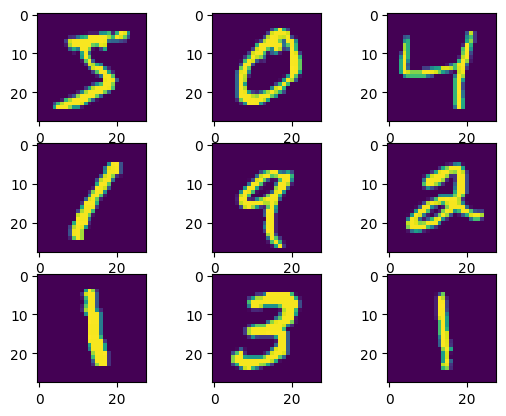

In [4]:
import matplotlib.pyplot as plt

from torchvision.datasets.mnist import MNIST
from torchvision.transforms import ToTensor

#학습용 데이터와 평가용 데이터 분리
training_data = MNIST(root='./', train=True, download=True, transform=ToTensor())
test_data = MNIST(root='./', train=False, download=True, transform=ToTensor())

print(len(training_data)) # 학습에 사용할 데이터 개수
print(len(test_data)) # 평가에 사용할 데이터 개수

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(training_data.data[i])
plt.show()

In [6]:
from torch.utils.data import DataLoader

train_loader = DataLoader(training_data, batch_size=32, shuffle=True)

#평가용은 데이터를 섞을 필요가 없음
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [7]:
# 모델 정의 및 학습하기
import torch
import torch.nn as nn

from torch.optim.adam import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"

#MLP 모델은 벡터만을 입력받을 수 있기 때문에 이미지를 벡터로 변환해주어야 한다
model = nn.Sequential(
    nn.Linear(784,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,10)
)
model.to(device)

lr = 1e-3
optim = Adam(model.parameters(), lr=lr)

for epoch in range(20):
    for data, label in train_loader:
        optim.zero_grad()
        # -1 개수를 상관하지 않곘다 이미지를 일렬로 펴줌
        data = torch.reshape(data, (-1, 784)).to(device)
        preds = model(data)
        
        loss = nn.CrossEntropyLoss()(preds, label.to(device))
        loss.backward()
        optim.step()
    
    print(f"epoch{epoch+1} loss:{loss.item()}")
    
torch.save(model.state_dict(), "MNIST.pth")

epoch1 loss:0.2851230800151825
epoch2 loss:0.20117917656898499
epoch3 loss:0.06286991387605667
epoch4 loss:0.15645428001880646
epoch5 loss:0.11009824275970459
epoch6 loss:0.015908142551779747
epoch7 loss:0.0018316565547138453
epoch8 loss:0.006797058042138815
epoch9 loss:0.015112443827092648
epoch10 loss:0.044872116297483444
epoch11 loss:0.0018677616026252508
epoch12 loss:0.00778456125408411
epoch13 loss:0.05483899638056755
epoch14 loss:0.001495536183938384
epoch15 loss:0.0007804374909028411
epoch16 loss:0.0011007122229784727
epoch17 loss:0.0005439930828288198
epoch18 loss:0.00016305413737427443
epoch19 loss:0.0010563066462054849
epoch20 loss:0.006156930699944496


In [9]:
model.load_state_dict(torch.load("MNIST.pth", map_location=device))

num_corr = 0 #분류에 성공한 전체 개수

with torch.no_grad():
    for data, label in test_loader:
        data = torch.reshape(data, (-1, 784)).to(device)
        
        output = model(data.to(device))
        preds= output.data.max(1)[1]
        
        corr = preds.eq(label.to(device).data).sum().item()
        num_corr += corr 
        
    print(f"Accurancy: {num_corr/len(test_data)}")
        

Accurancy: 0.9743
